In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_original_df = pd.read_csv(city_data_to_load)
ride_original_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
combo_city_ride_df = pd.merge(ride_original_df, city_original_df, on="city")

# Display the data table for preview
combo_city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
combo_city_ride_df[[]]

grouped_fare_average =combo_city_ride_df.groupby(["type"])["fare"].average()

#plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]


# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


Text(0.95, 0.5, 'Note:\nCircle size correlates with driver count per city.')

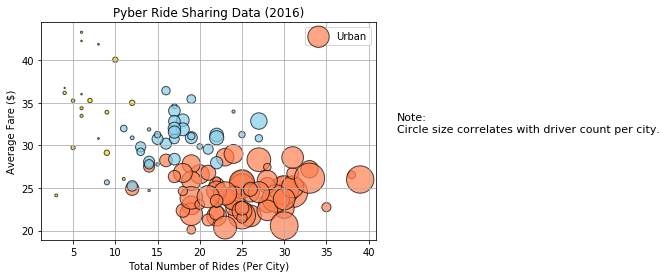

In [38]:
small_city_type = combo_city_ride_df[["city", "type"]].copy()
unduped_city_type = pd.DataFrame.drop_duplicates(small_city_type)

grouped_city_ride_count= combo_city_ride_df.groupby(["city"])["ride_id"].count()
grouped_city_fare_avg= combo_city_ride_df.groupby(["city"])["fare"].mean()
grouped_city_driver_sum= combo_city_ride_df.groupby(["city"])["driver_count"].sum()


combo_city_ride_fare_df= pd.merge(grouped_city_ride_count, grouped_city_fare_avg, on="city")
combo_city_type_driver_df= pd.merge(unduped_city_type, grouped_city_driver_sum, on="city")
combo_grouped_city_all_df= pd.merge(combo_city_type_driver_df,combo_city_ride_fare_df, on="city")
combo_grouped_city_all_df.head()

#sns.scatterplot(x="fare", y="fare",data=combo_city_ride_df, hue="type", size="driver_count")
#sns.set()
#sns.scatterplot(x="ride_id", y="fare",data=combo_grouped_city_all_df, size="driver_count").set_title('Pyber Ride Sharing Data (2016)')
fig, ax= plt.subplots()


text_str ="Note:\nCircle size correlates with driver count per city."

colors = {'Rural':'gold', 'Suburban':'skyblue', 'Urban':"coral"}
#colors = ("gold","skyblue", "coral")
groups = ("Rural", "Suburban", "Urban")
#c=combo_grouped_city_all_df["type"]

#for color, group in 

plt.scatter(combo_grouped_city_all_df["ride_id"],combo_grouped_city_all_df["fare"], s=combo_grouped_city_all_df["driver_count"]*.4, c=combo_grouped_city_all_df["type"].apply(lambda x: colors[x]), label=colors, edgecolors="k", alpha=0.7)
ax.grid(True)
ax.legend(("Urban","Rural","Suburban"))
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(.95, 0.5, text_str, fontsize=11, transform=plt.gcf().transFigure)

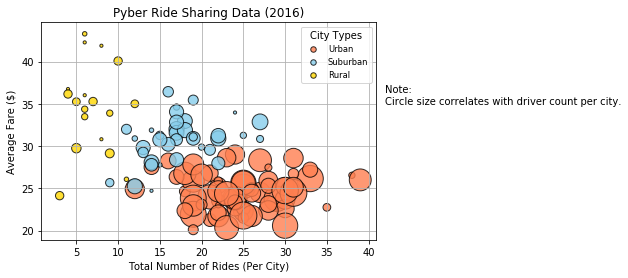

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

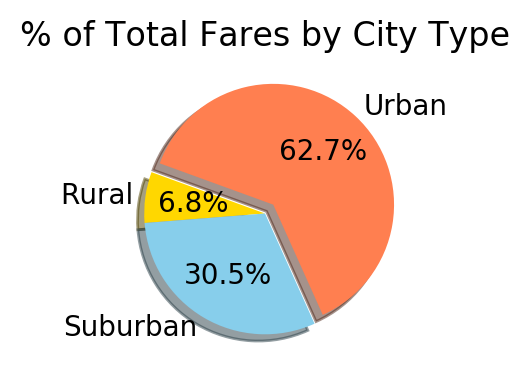

In [4]:
# Calculate Type Percents

#rural_distribution = combo_city_ride_df['Gender'].value_counts()
#suburban_distribution = combo_city_ride_df["Gender"].value_counts() / purchase_data_df['SN'].nunique()
#urban_distribution = combo_city_ride_df

grouped_city_fare_df = combo_city_ride_df.groupby(["type"])["fare"].sum()


# Build Pie Chart

fig = plt.figure(figsize=(3,2), dpi=200)
#ax = plt.subplot(111)
explode = (0, 0, 0.1)
labels= ["Rural","Suburban","Urban"]
colors = ["gold","skyblue", "coral"]
plt.title('% of Total Fares by City Type')
#works, but not want assignment wants?.  city_type_total.plot(kind='pie', ax=ax, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=300, fontsize=12)

plt.pie(grouped_city_fare_df, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, labeldistance=1.1, startangle=160, radius=None, counterclock=True, center=(0, 0), frame=False, data=None)

# Save Figure
fig.savefig('TotalFaresPie.png', dpi=200)

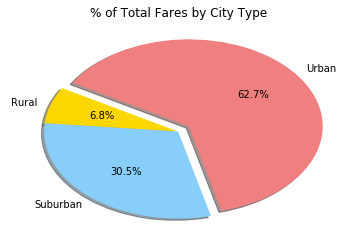

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

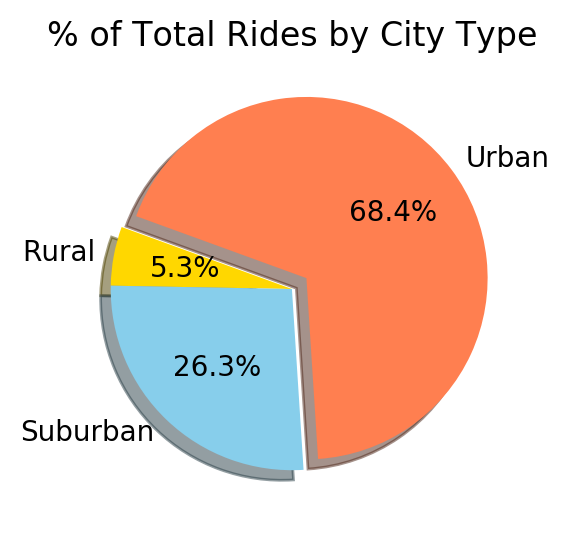

In [6]:
# Calculate Ride Percents

grouped_city_ride_df = combo_city_ride_df.groupby(["type"])["ride_id"].count()


# Build Pie Chart

fig = plt.figure(figsize=(3,3), dpi=200)
#ax = plt.subplot(111)
explode = (0, 0, 0.1)
labels= ["Rural","Suburban","Urban"]
colors = ["gold","skyblue", "coral"]
plt.title('% of Total Rides by City Type')

plt.pie(grouped_city_ride_df, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, labeldistance=1.1, startangle=160, radius=None, counterclock=True, center=(0, 0), frame=False, data=None)

# Save Figure
fig.savefig('TotalRidesPie.png', dpi=200)

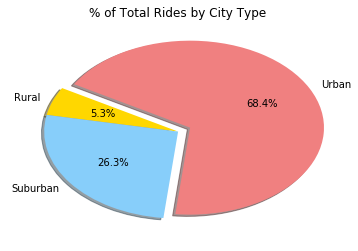

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

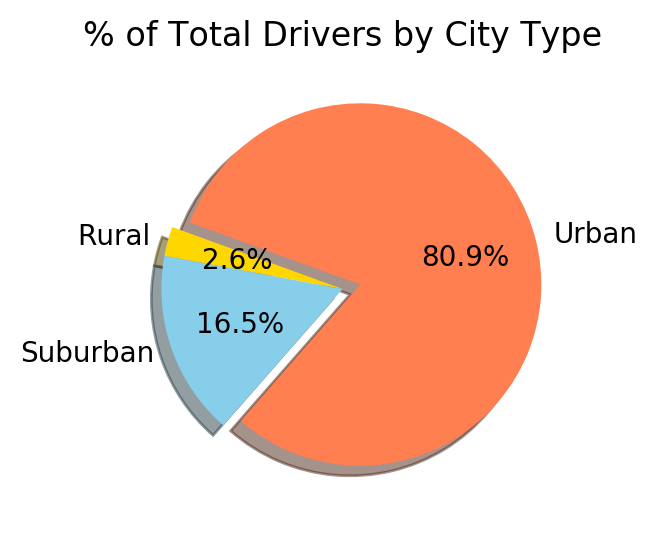

In [5]:
# Calculate Driver Percents

#grouped_city_drivers_df = combo_city_ride_df.groupby(["type"])["driver_count"].sum()

grouped_city_drivers_df = city_original_df.groupby(["type"])["driver_count"].sum()

# Build Pie Chart

fig = plt.figure(figsize=(3,3), dpi=200)
#ax = plt.subplot(111)
explode = (0, 0, 0.1)
labels= ["Rural","Suburban","Urban"]
colors = ["gold","skyblue", "coral"]
plt.title('% of Total Drivers by City Type')

plt.pie(grouped_city_drivers_df, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, labeldistance=1.1, startangle=160, radius=None, counterclock=True, center=(0, 0), frame=False, data=None)

# Save Figure
fig.savefig('TotalDriversPie.png', dpi=200)

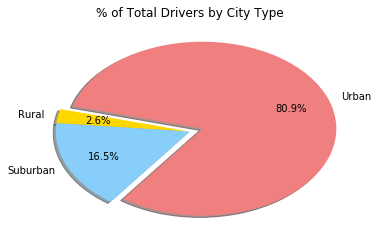

In [6]:
# Show Figure
plt.show()